### Import Dataset and librairies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import hvplot.pandas

In [46]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [47]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [49]:
df.shape

(1470, 35)

In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
df.isnull().values.any()

False

#### Suprimer les variable avec une seule valeure unique et celles non utiles

In [52]:
for col in df.columns:
    print("Pour la variable", col, "le nombre des valeurs uniques est: ",df[col].nunique())
    print("==========================================================")

Pour la variable Age le nombre des valeurs uniques est:  43
Pour la variable Attrition le nombre des valeurs uniques est:  2
Pour la variable BusinessTravel le nombre des valeurs uniques est:  3
Pour la variable DailyRate le nombre des valeurs uniques est:  886
Pour la variable Department le nombre des valeurs uniques est:  3
Pour la variable DistanceFromHome le nombre des valeurs uniques est:  29
Pour la variable Education le nombre des valeurs uniques est:  5
Pour la variable EducationField le nombre des valeurs uniques est:  6
Pour la variable EmployeeCount le nombre des valeurs uniques est:  1
Pour la variable EmployeeNumber le nombre des valeurs uniques est:  1470
Pour la variable EnvironmentSatisfaction le nombre des valeurs uniques est:  4
Pour la variable Gender le nombre des valeurs uniques est:  2
Pour la variable HourlyRate le nombre des valeurs uniques est:  71
Pour la variable JobInvolvement le nombre des valeurs uniques est:  4
Pour la variable JobLevel le nombre des vale

In [53]:
df.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], inplace=True)

In [54]:
df.shape

(1470, 31)

In [55]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

###  Data cleansing

In [56]:
# selectionner les colonnes non_numériques
df_categ = df.select_dtypes(exclude=[np.number])

In [57]:
df_categ

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [58]:
for col in df_categ.columns:
    print("Pour la variable", col, "les valeurs uniques sont:\n",df[col].unique())
    print("==========================================================")

Pour la variable Attrition les valeurs uniques sont:
 ['Yes' 'No']
Pour la variable BusinessTravel les valeurs uniques sont:
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Pour la variable Department les valeurs uniques sont:
 ['Sales' 'Research & Development' 'Human Resources']
Pour la variable EducationField les valeurs uniques sont:
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Pour la variable Gender les valeurs uniques sont:
 ['Female' 'Male']
Pour la variable JobRole les valeurs uniques sont:
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Pour la variable MaritalStatus les valeurs uniques sont:
 ['Single' 'Married' 'Divorced']
Pour la variable OverTime les valeurs uniques sont:
 ['Yes' 'No']


In [59]:
df_categ

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [60]:
label = LabelEncoder()
#df["Attrition"] = label.fit_transform(df.Attrition)

In [61]:
#df["OverTime"] = label.fit_transform(df.OverTime)

In [62]:
#df["OverTime"]

In [63]:
#df["Attrition"].unique()

### Créer des variables catégoriques

#### Créer une variable catégorie d'àge car nous avons 43 ages 

In [64]:
df['cat_Age'] = pd.cut(df['Age'],
                            bins=[18, 30, 40, 50, 60, float('Inf')],
                            labels=[0, 1, 2, 3, 4],
                            right=False)


In [65]:
#df['cat_Age'].unique()

In [66]:
# df['cat_Age'].value_counts()

#### Créer une variable catégorie  MonthlyIncome

In [67]:
df['cat_MonthlyIncome'] = pd.cut(df['MonthlyIncome'],
                            bins=[1000, 3000, 5000, 8000, float('Inf') ],
                            labels=['low', 'medium', 'high', 'very high'],
                            right=False)

In [68]:
# df['cat_MonthlyIncome'].unique()

In [69]:
# df['cat_MonthlyIncome'].value_counts()

#### Créer une variable catégorie  MonthlyRate

In [70]:
df['cat_MonthlyRate'] = pd.cut(df['MonthlyRate'],
                            bins=[2000, 8000, 15000, 20000, float('Inf') ],
                            labels=['low', 'medium', 'high', 'very high'],
                            right=False)

In [71]:
# df['cat_MonthlyRate'].unique()

In [72]:
#df['cat_MonthlyRate'].value_counts()

#### Créer une variable catégorie Hourlyrate

In [73]:
df['cat_HourlyRate'] = pd.cut(df['HourlyRate'],
                            bins=[30, 50, 75, float('Inf') ],
                            labels=['low', 'medium', 'high'],
                            right=False)

In [74]:
# df['cat_HourlyRate'].unique()

In [75]:
# df['cat_HourlyRate'].value_counts()

#### Créer une variable catégorie Dailyrate

In [76]:
df['cat_DailyRate'] = pd.cut(df['DailyRate'],
                            bins=[100, 500, 1000, float('Inf') ],
                            labels=['low', 'medium', 'high'],
                            right=False)

In [77]:
# df['cat_DailyRate'].unique()

In [78]:
# df['cat_DailyRate'].value_counts()

#### Créer une variable catégorie Hourlyrate

In [79]:
df['cat_PercentSalaryHike'] = pd.cut(df['PercentSalaryHike'],
                            bins=[10, 15, 20, float('Inf') ],
                            labels=['low', 'medium', 'high'],
                            right=False)

In [80]:
# df['cat_PercentSalaryHike'].unique()

In [81]:
# df['cat_PercentSalaryHike'].value_counts()

#### Créer une variable catégorie distancefromhome  

In [82]:
df['cat_distance'] = pd.cut(df['DistanceFromHome'],
                            bins=[0, 2, 7, 14, float('Inf') ],
                            labels=['very close', 'close', 'distant', 'very distant'],
                            right=False)

In [83]:
# df['cat_distance'].unique()

In [84]:
# df['cat_distance'].value_counts()

####  Créer une variable catégorique  YearsInCurrentRole

In [85]:
df['cat_YearsInCurrentRole'] = pd.cut(df['YearsInCurrentRole'],
                            bins=[0, 2, 5, 10, float('Inf') ],
                            labels=['entry', 'intermediate', 'advanced', 'expert'],
                            right=False)

In [86]:
# df['experience_level'].unique()

In [87]:
# df['experience_level'].value_counts()

#### Créer une variable catégorique YearsAtCompany

In [88]:
df['cat_YearsAtCompany'] = pd.cut(df['YearsAtCompany'],
                            bins=[0, 5, 10, 20, 30, float('Inf')],
                            labels=['0 to 5', '5 to 10', '10 to 20', '20 to 30', 'Over30'],
                            right=False)

In [89]:
# df['Seniority'].unique()

In [90]:
# df['Seniority'].value_counts()

#### Créer une variable catégorique YearsSinceLastPromotion

In [91]:
df['cat_YearsSinceLastPromotion'] = pd.cut(df['YearsSinceLastPromotion'],
                            bins=[0, 5, 10, 15, float('Inf')],
                            labels=['0 to 5', '5 to 10', '10 to 15', 'over 15'],
                            right=False)

In [92]:
# df['cat_YearsSinceLastPromotion'].unique()

In [93]:
# df['cat_YearsSinceLastPromotion'].value_counts()

#### Créer une variable catégorique YearsWithCurrManager

In [94]:
df['cat_YearsWithCurrManager'] = pd.cut(df['YearsWithCurrManager'],
                            bins=[0, 5, 10, 17, float('Inf')],
                            labels=['0 to 5', '5 to 10', '10 to 17', 'over 17'],
                            right=False)

In [95]:
# df['cat_YearsWithCurrManager'].unique()

In [96]:
# df['cat_YearsWithCurrManager'].value_counts()

###  Select numerical columns 

In [97]:
num_col = []
for column in df.columns:
    if (df[column].dtypes != object):
        num_col.append(column)


In [98]:
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'cat_Age',
 'cat_MonthlyIncome',
 'cat_MonthlyRate',
 'cat_HourlyRate',
 'cat_DailyRate',
 'cat_PercentSalaryHike',
 'cat_distance',
 'cat_YearsInCurrentRole',
 'cat_YearsAtCompany',
 'cat_YearsSinceLastPromotion',
 'cat_YearsWithCurrManager']

In [99]:
df[num_col].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


### Data viz

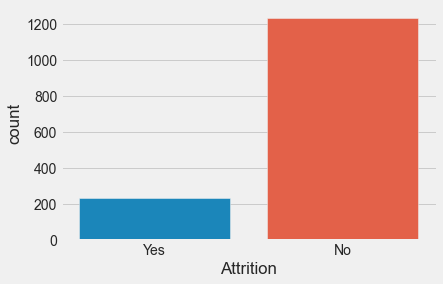

In [100]:
sns.countplot(x = "Attrition",data=df)
plt.show()

In [ ]:
sns.countplot(x = "Department",data=df)
plt.show()

In [101]:
print(len(df))
print(len(df[df['Attrition']==1]))
print(len(df[df['Attrition']==0]))
print("percentage of yes Attrition is:",(len(df[df['Attrition']==1])/len(df))*100,"%")
print("percentage of no Attrition is:",(len(df[df['Attrition']==0])/len(df))*100,"%")

1470
0
0
percentage of yes Attrition is: 0.0 %
percentage of no Attrition is: 0.0 %


<AxesSubplot:xlabel='OverTime', ylabel='MonthlyIncome'>

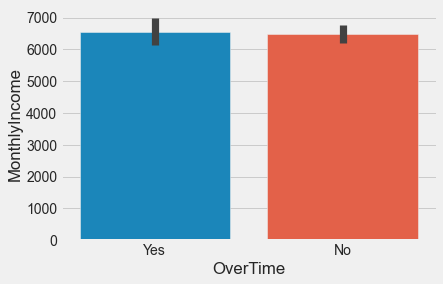

In [102]:
sns.barplot(data=df, x="OverTime" ,y="MonthlyIncome")

<AxesSubplot:xlabel='OverTime', ylabel='MonthlyRate'>

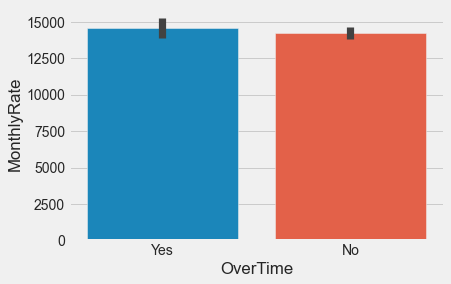

In [103]:
sns.barplot(data=df, x="OverTime" ,y="MonthlyRate")

In [109]:
df.to_csv('cleaned_RH_IBM.csv', index=False)

In [110]:
df_cleaned = pd.read_csv('cleaned_RH_IBM.csv')

In [111]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_Age,cat_MonthlyIncome,cat_MonthlyRate,cat_HourlyRate,cat_DailyRate,cat_PercentSalaryHike,cat_distance,cat_YearsInCurrentRole,cat_YearsAtCompany,cat_YearsSinceLastPromotion,cat_YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,2,high,high,high,high,low,very close,intermediate,5 to 10,0 to 5,5 to 10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,2,high,very high,medium,low,high,distant,advanced,10 to 20,0 to 5,5 to 10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1,low,low,high,high,medium,close,entry,0 to 5,0 to 5,0 to 5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1,low,very high,medium,high,low,close,advanced,5 to 10,0 to 5,0 to 5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0,medium,high,low,medium,low,close,intermediate,0 to 5,0 to 5,0 to 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,1,low,medium,low,medium,medium,very distant,intermediate,5 to 10,0 to 5,0 to 5
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,1,very high,very high,low,medium,medium,close,advanced,5 to 10,0 to 5,5 to 10
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0,high,low,high,low,high,close,intermediate,5 to 10,0 to 5,0 to 5
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,2,high,medium,medium,high,low,close,advanced,5 to 10,0 to 5,5 to 10
